Method:
1.Calculate probability Density from Test Data using mean and variance
2.Find Best Epsilon Value Using Cross Validation Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy import stats
%matplotlib inline

Text(0, 0.5, 'Throughput')

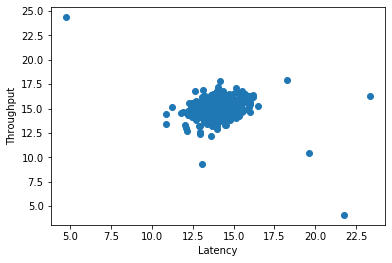

In [2]:
df = loadmat("ex8data1.mat")
X = df['X']
plt.scatter(X[:,0],X[:,1])
plt.xlabel("Latency")
plt.ylabel("Throughput")

In [3]:
def EstimateGaussian(X):
    mu = np.mean(X,0)
    sigma2 = np.var(X,0)
    return mu,sigma2

In [4]:
# Calculate Mean and Variance using Training Data
mu, sigma2 = EstimateGaussian(X)
mu,sigma2

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

In [28]:
# Calculate Probability Density
p = stats.multivariate_normal.pdf(X,mean=mu,cov=sigma2)
Xval = df['Xval']
yval = df['yval'].flatten()
# Calculate Probability Density of CV data
pval = stats.multivariate_normal.pdf(Xval,mu,sigma2)

In [50]:
# If normal(0) probability high
# Calculate Best epsilon
# Use Cross Validation Data to Calculate Threshold
def SelectThreshold(yval,pval):
    BestEpsilon = 0
    F1 = 0
    F1Score = 0
    stepsize = (max(pval) - min(pval))/1000
    for i in np.arange(min(pval),max(pval),stepsize):
        predictions = pval < i
        tp = np.sum(np.logical_and(predictions==1,yval==1))
        fp = np.sum(np.logical_and(predictions==1,yval==0))
        fn = np.sum(np.logical_and(predictions==0,yval==1))
        prec = tp/(tp+fp)
        recall = tp/(tp+fn)
        F1 = (2*prec*recall)/(prec+recall)
        if(F1>F1Score):
            F1Score = F1
            BestEpsilon = i
    return F1Score,BestEpsilon

In [52]:
F1Score,BestEpsilon = SelectThreshold(yval,pval)
print(F1Score,BestEpsilon)

0.8750000000000001 8.990852779269493e-05


C:\Users\Praful\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


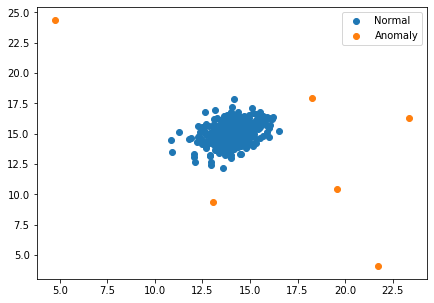

In [76]:
fig,ax = plt.subplots(figsize=(7,5))
# Normal Examples
normal = p > BestEpsilon
# Abnormal Examples
abnormal = p <= BestEpsilon
ax.scatter(X[normal,0],X[normal,1],label="Normal")
ax.scatter(X[abnormal,0],X[abnormal,1],label="Anomaly")
plt.legend()